# Módulo 5 - Modelos, Métricas e Validação

No curso continuar nosso mergulho em Machine Learning, no problema proposto pelo hospital Sírio Libanês.

Desta vez desenvolveremos nosso curso nos notebooks do [Google Colab](https://colab.research.google.com/), você pode ficar livre para desenvolver em um jupyter notebook, outras plataformas como o Kaggle ou com a sua IDE favorita. 

Para desenvolver nosso curso vamos precisar da base de dados, em  vídeo mostramos como você pode acessar a base de dados direto da  competição criada pelo [Sírio Libanês no Kaggle](https://www.kaggle.com/Sírio-Libanes/covid19).

Você também pode acessar os notebooks de todas as aulas diretamente pelo [github do projeto](https://github.com/alura-cursos/covid-19-clinical-2).

Com nossos equipamentos de mergulho Okay, chegou a hora de se aprofundar.

Bons estudos cientistas!

## Aula 01 - Workflow e Ajustes nos Dados

O que aprendemos:

- Qual é um possível Workflow em um projeto de Data Science;

- Realizar uma transformação de dados em dados categóricos;

- Aumentar o número de iterações da regressão logística para convergir.


Desafio 01: Transformar a coluna AGE_PERCENTIL em dados categoricos, mas utilizando outro metodo

In [ ]:
import pandas as pd
import numpy as np

# dados = pd.read_excel("https://github.com/alura-cursos/covid-19-clinical/blob/main/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true")
dados = pd.read_excel("../modulo-4/data/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx")
dados.head()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  ...    WINDOW  ICU
0                         0            1  ...       0-2    0
1                         0            1  ...       2-4    0
2                         0            1  ...       4-6    0
3                         0            1  ...      6-12    0
4                         0            1  ...  ABOVE_12    1

[5 rows x 231 columns]

In [ ]:
def preenche_tabela(dados):
    features_continuas_colunas = dados.iloc[:, 13:-2].columns
    features_continuas = dados.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False)[features_continuas_colunas].fillna(method='bfill').fillna(method='ffill')
    features_categoricas = dados.iloc[:, :13]
    saida = dados.iloc[:, -2:]
    dados_finais = pd.concat([features_categoricas, features_continuas, saida], ignore_index=True,axis=1)
    dados_finais.columns = dados.columns
    return dados_finais

In [ ]:
dados_limpos = preenche_tabela(dados)
a_remover = dados_limpos.query("WINDOW=='0-2' and ICU==1")['PATIENT_VISIT_IDENTIFIER'].values
dados_limpos = dados_limpos.query("PATIENT_VISIT_IDENTIFIER not in @a_remover")
dados_limpos = dados_limpos.dropna()
dados_limpos.describe()

PATIENT_VISIT_IDENTIFIER  ...          ICU
count               1760.000000  ...  1760.000000
mean                 192.818182  ...     0.201705
std                  110.637724  ...     0.401387
min                    0.000000  ...     0.000000
25%                   97.750000  ...     0.000000
50%                  191.500000  ...     0.000000
75%                  289.250000  ...     0.000000
max                  384.000000  ...     1.000000

[8 rows x 229 columns]

In [ ]:
def prepare_window(rows):
    if(np.any(rows["ICU"])):
        rows.loc[rows["WINDOW"]=="0-2", "ICU"] = 1
    return rows.loc[rows["WINDOW"] == "0-2"]

dados_limpos = dados_limpos.groupby("PATIENT_VISIT_IDENTIFIER").apply(prepare_window)
dados_limpos.AGE_PERCENTIL = dados_limpos.AGE_PERCENTIL.astype("category").cat.codes
dados_limpos.head()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  ...  WINDOW  ICU
PATIENT_VISIT_IDENTIFIER                                            ...             
0                        0                          0            1  ...     0-2    1
2                        10                         2            0  ...     0-2    1
3                        15                         3            0  ...     0-2    0
4                        20                         4            0  ...     0-2    0
5                        25                         5            0  ...     0-2    0

[5 rows x 231 columns]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

np.random.seed(73246)


x_columns = dados.columns
y = dados_limpos["ICU"]
x = dados_limpos[x_columns].drop(["ICU","WINDOW"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)
modelo = DummyClassifier()
modelo.fit(x_train, y_train)

y_prediction = modelo.predict(x_test)
accuracy_score(y_test, y_prediction)

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


0.48863636363636365

In [ ]:
modelo = LogisticRegression(max_iter=10000)
modelo.fit(x_train, y_train)

y_prediction = modelo.predict(x_test)
accuracy_score(y_test, y_prediction)

0.6818181818181818

In [ ]:
for coluna in dados.columns:
    if coluna not in x_columns:
        print(coluna)

In [ ]:
dados_limpos.AGE_PERCENTIL.value_counts()

1    42
2    39
3    38
0    37
7    36
9    34
6    34
4    34
5    30
8    28
Name: AGE_PERCENTIL, dtype: int64

In [ ]:
#Desafio 01: Transformar a coluna AGE_PERCENTIL em dados categoricos, mas utilizando outro metodo

## Aula 02 - Métricas de Avaliação

**O que aprendemos**

- Como usar uma árvore de decisão;

- Analisar a qualidade dos resultados com a matriz de confusão;

- Gerar um relatório do resultado da classificação;

- O que é Recall, Precision, F-1 e AUC.

**Desafios**

Desafio 02: Verificar o impacto da mudança nos resultados.

Desafio 03: Pesquisar sobre F-score.

Desafio 04: Pesquisar e plotar a arvore de decisão criada pelo modelo. (DICA: fazer no collab pra facilitar, pois tem que instalar algo??)

- https://mljar.com/blog/visualize-decision-tree/

Desafio 05: Criar uma função que gere a curva ROC.

Desafio 06: Pensar e tentar diminuir o efeito de aleatoriedade nas previsões.

> Para desafios 4, 5 e 6, ver: - https://github.com/PedroHCAlmeida/Bootcamp_alura/blob/main/Modulo_5/Aulas/Aulas_modulo_5.ipynb

Você pode baixar acessar os códigos e dados desta aula por esse Link.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelo_arvore = DecisionTreeClassifier()
modelo_arvore.fit(x_train,y_train)
predicao_arvore = modelo_arvore.predict(x_test)
accuracy_score(y_test, predicao_arvore)

0.6590909090909091

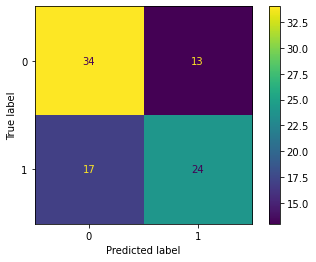

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(modelo_arvore, x_test, y_test)

A acurácia mostra apenas diagonal de acertos da matriz de confusão, apenas o que acertamos, apenas os quadrantes amarelo e ciano nesta matriz. 

In [ ]:
VP = 24
VN = 34
FP = 13
FN = 17

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicao_arvore))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69        47
           1       0.65      0.59      0.62        41

    accuracy                           0.66        88
   macro avg       0.66      0.65      0.65        88
weighted avg       0.66      0.66      0.66        88



### Precision, Recall e F-1

https://en.wikipedia.org/wiki/Precision_and_recall

- Precision = todas as minhas classificacoes positivas, quantas sao realmente positivas 
Objetivo de reduzir o Falso Positivo


- Recall = todas as classes positivas, quantas eu realmente classifiquei corretamente 
Objetivo de reduzir o Falso Negativo

- F-1 = [média harmonica](https://pt.wikipedia.org/wiki/M%C3%A9dia_harm%C3%B4nica) entre precision e recall
F1 é um caso específico do [F-Score](https://en.wikipedia.org/wiki/F-score)

<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg" style="height: 70%">

In [ ]:
VP/(VP+FP)

0.6486486486486487

In [ ]:
p = 1.0
r = 0.001
f1 = 2* (p * r)/(p + r)
print(f1)

0.0019980019980019984


### ROC curve

*from [Wikipedia](https://en.wikipedia.org/wiki/Area_under_the_curve_(receiver_operating_characteristic)  )*

Receiver operating characteristic curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection in machine learning. The false-positive rate is also known as probability of false alarm and can be calculated as (1 − specificity).

Sometimes, the ROC is used to generate a summary statistic. Common versions are:

- the intercept of the ROC curve with the line at 45 degrees orthogonal to the no-discrimination line - the balance point where Sensitivity = 1 - Specificity
- the intercept of the ROC curve with the tangent at 45 degrees parallel to the no-discrimination line that is closest to the error-free point (0,1) - also called Youden's J statistic and generalized as Informedness[citation needed]
- the area between the ROC curve and the no-discrimination line multiplied by two is called the Gini coefficient. It should not be confused with the measure of statistical dispersion also called Gini coefficient.
- the area between the full ROC curve and the triangular ROC curve including only (0,0), (1,1) and one selected operating point ( t p r , f p r ) {\displaystyle (tpr,fpr)} {\displaystyle (tpr,fpr)} - Consistency[24]
- the area under the ROC curve, or "AUC" ("area under curve"), or A' (pronounced "a-prime"),[25] or "c-statistic" ("concordance statistic").[26]
- the sensitivity index d' (pronounced "d-prime"), the distance between the mean of the distribution of activity in the system under noise-alone conditions and its distribution under signal-alone conditions, divided by their standard deviation, under the assumption that both these distributions are normal with the same standard deviation. Under these assumptions, the shape of the ROC is entirely determined by d'.

However, any attempt to summarize the ROC curve into a single number loses information about the pattern of tradeoffs of the particular discriminator algorithm. 

In [ ]:
from sklearn.metrics import roc_auc_score

prob_arvore = modelo_arvore.predict_proba(x_test)
roc_auc_score(y_test, prob_arvore[:,1])

0.6543850544888428

In [ ]:
modelo_arvore.classes_

array([0, 1])

In [ ]:
def roda_modelo(modelo, dados):

    x_columns = dados.columns
    y = dados["ICU"]
    x = dados[x_columns].drop(["ICU","WINDOW"], axis=1)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

    modelo.fit(x_train, y_train)
    predicao = modelo.predict(x_test)
    prob_predic = modelo.predict_proba(x_test)

    auc = roc_auc_score(y_test, prob_predic[:,1])
    print(f"AUC {auc}\n")
    print("Classification Report".center(60, '-'))
    print(classification_report(y_test, predicao))    

In [ ]:
roda_modelo(modelo_arvore, dados_limpos)

AUC 0.6193565127140633

Classification Report
              precision    recall  f1-score   support

           0       0.63      0.70      0.67        47
           1       0.61      0.54      0.57        41

    accuracy                           0.62        88
   macro avg       0.62      0.62      0.62        88
weighted avg       0.62      0.62      0.62        88



In [ ]:
roda_modelo(modelo, dados_limpos)

AUC 0.7410482615464452

Classification Report
              precision    recall  f1-score   support

           0       0.64      0.81      0.72        47
           1       0.69      0.49      0.57        41

    accuracy                           0.66        88
   macro avg       0.67      0.65      0.64        88
weighted avg       0.67      0.66      0.65        88



## Aula 03 - Efeitos de Aleatoriedade

**O que aprendemos**

- Como criar uma função para treinar N vezes seu modelo;
- Como a aleatoriedade interfere na sua escolha;
- Cálculo do intervalo mínimo e máximo para a métrica AUC;
- Como reduzir o efeito de aleatoriedade na tomada de decisão.


**Desafios**

Desafio 07: Estudar a documentação do sklearn e testar outros modelos.

Você pode baixar acessar os códigos e dados desta aula por esse [Link](https://github.com/alura-cursos/covid-19-clinical-2/blob/main/md_06_3.ipynb)


In [ ]:
import numpy as np
def roda_n_modelos(modelo, dados, n):

    x_columns = dados.columns
    y = dados["ICU"]
    x = dados[x_columns].drop(["ICU","WINDOW"], axis=1)
    
    auc_lista = []
    for _ in range(n):
        
        x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

        modelo.fit(x_train, y_train)
        prob_predic = modelo.predict_proba(x_test)
        auc = roc_auc_score(y_test, prob_predic[:,1])
        auc_lista.append(auc)
    
    auc_medio = np.mean(auc_lista)
    auc_std = np.std(auc_lista)
    print(f"AUC {auc_medio}")
    print(f"Intervalo {auc_medio - 2* auc_std} - {auc_medio + 2* auc_std}")

In [ ]:
roda_n_modelos(modelo_arvore, dados_limpos,50)

AUC 0.6309289050337312
Intervalo 0.5351693321456963 - 0.7266884779217662


In [ ]:
roda_n_modelos(modelo_arvore, dados_limpos,50)

AUC 0.6297145822522056
Intervalo 0.554143901815563 - 0.7052852626888482


In [ ]:
roda_n_modelos(modelo, dados_limpos,50)

AUC 0.7537934613388687
Intervalo 0.6717195333460788 - 0.8358673893316586


In [ ]:
roda_n_modelos(modelo, dados_limpos,50)

AUC 0.7639750908147378
Intervalo 0.6761452654131503 - 0.8518049162163253


## Aula 04 - Validação Cruzada

**O que aprendemos**

- O que é validação cruzada;
- Como usar a Validação cruzada do Sci-Kit Learn;
- Qual Validação cruzada usar no nosso caso de uso.

**Desafios**

Desafio 08: Testar outros splitter classes e observar as diferenças.

Você pode baixar acessar os códigos e dados desta aula por esse [Link](https://github.com/alura-cursos/covid-19-clinical-2/blob/main/md_06_4.ipynb)


---
sklearn cross_validate

https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate  

User Guide:
https://scikit-learn.org/dev/modules/cross_validation.html#cross-validation

StratifiedKFold é apenas uma das formas, uma das [Splitter Classes](https://scikit-learn.org/dev/modules/classes.html#splitter-classes)

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits = 5, shuffle = True)
cross_validate(modelo, x, y, cv=cv)

{'fit_time': array([0.23308277, 0.22584796, 0.52392364, 0.16399884, 0.51125073]),
 'score_time': array([0.00217533, 0.00221658, 0.00229359, 0.00220704, 0.00214744]),
 'test_score': array([0.73239437, 0.8028169 , 0.7       , 0.6       , 0.7       ])}

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold


cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats=10)
cross_validate(modelo, x, y, cv=cv)

{'fit_time': array([0.20660973, 0.22653484, 0.19561434, 0.57940388, 0.49080038,
        0.58906364, 0.60080957, 0.50807691, 0.52616215, 0.53228569,
        0.51983809, 0.4808383 , 0.27274132, 0.18738294, 0.50895   ,
        0.51831341, 0.65189743, 0.51596427, 0.47891331, 0.57310081,
        0.5710628 , 0.53825164, 0.61305928, 0.63411188, 0.23824477,
        0.19599652, 0.51336503, 0.24959755, 0.42618608, 0.21849465,
        0.51726556, 0.55677247, 0.28220105, 0.49283433, 0.2077527 ,
        0.56731343, 0.30168939, 0.5340662 , 0.66712427, 0.59548664,
        0.63867354, 0.22390795, 0.52935386, 0.24644494, 0.55973959,
        0.60877895, 0.1612215 , 0.25236034, 0.58304858, 0.24697614]),
 'score_time': array([0.00224113, 0.00220156, 0.00221753, 0.00242496, 0.00216317,
        0.0022037 , 0.00221634, 0.00221205, 0.00253272, 0.00216579,
        0.00216436, 0.00213933, 0.00215864, 0.00216627, 0.00213337,
        0.00215602, 0.00220513, 0.00218225, 0.00216126, 0.00219178,
        0.00219202, 

In [ ]:
def roda_modelo_cv(modelo, dados, n_splits, n_repeats):

    np.random.seed(1231234)
    dados = dados.sample(frac=1).reset_index(drop=True)
    x_columns = dados.columns
    y = dados["ICU"]
    x = dados[x_columns].drop(["ICU","WINDOW"], axis=1)
    
    
    cv = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats=n_repeats)
    resultados=cross_validate(modelo, x, y, cv=cv, scoring='roc_auc', return_train_score=True)
    
    auc_medio = np.mean(resultados['test_score'])
    auc_medio_treino = np.mean(resultados['train_score'])

    auc_std = np.std(resultados['test_score'])
    
    print(f'AUC  {auc_medio} - {auc_medio_treino}')
    return auc_medio, auc_medio_treino
    #print(f"AUC Médio {auc_medio} Intervalo {auc_medio - (2*auc_std)} - {auc_medio + (2*auc_std)}")
    

In [ ]:
roda_modelo_cv(modelo, dados_limpos, 5, 10)

AUC Médio 0.7575511875511876 Intervalo 0.6366273412799195 - 0.8784750338224556


In [ ]:
roda_n_modelos(modelo, dados_limpos, 50)

AUC 0.759190451478983
Intervalo 0.672363647045164 - 0.846017255912802


## Aula 05 - Desafios em Machine Learning

**O que aprendemos**

O que é Overfit;

Como verificar o Overfit;

Usar o algoritmo de RandomForest.


**Desafios**

Desafio 09: Deixar o gráfico de AUC bonitão.

Desafio 10: Criar um sobreajuste com outra base de dados, outro modelo de ML e plotar o gráfico para análise. (Dica: Base do titanic).

Desafio 11: Estudar um pouco mais sobre overfit e underfit.

Desafio 12: Escolha um modelo de ML, estude os hiperparâmetros desse modelo e teste vários hiperparâmetros.

Desafio 13: Pesquisar como salvar um modelo treinado.

Você pode baixar acessar os códigos e dados desta aula por esse [Link](https://github.com/alura-cursos/covid-19-clinical-2/blob/main/md_06_5.ipynb)

In [ ]:
roda_modelo_cv(modelo_arvore, dados_limpos, 5, 10)

AUC Médio 0.6279279683391525 Intervalo 0.4988394445682657 - 0.7570164921100394


In [ ]:
from sklearn.tree import DecisionTreeClassifier

teste_lista = []
treino_lista = []
for i in range(1,15):
    modelo_arvore = DecisionTreeClassifier(max_depth=i)
    teste, treino = roda_modelo_cv(modelo_arvore, dados_limpos, 5, 10)
    teste_lista.append(teste)
    treino_lista.append(treino)

AUC  0.5755830262080263 - 0.6445982993536308
AUC  0.6544700741411268 - 0.75415524801741
AUC  0.6643847795163584 - 0.8243714304989842
AUC  0.6554932930837536 - 0.8832038893699776
AUC  0.6475058192163456 - 0.9275331115338461
AUC  0.6239047951959137 - 0.9567921210944048
AUC  0.6117738776455882 - 0.9745102329260463
AUC  0.5987671815056683 - 0.9855938255169409
AUC  0.5877544694814432 - 0.991376822665679
AUC  0.5917582923832925 - 0.9946888385564852
AUC  0.6009579413444545 - 0.9970452758822465
AUC  0.6147261533363507 - 0.9986297665919551
AUC  0.6212348996723998 - 0.9994661199548005
AUC  0.6256292095025647 - 0.9998695491440995


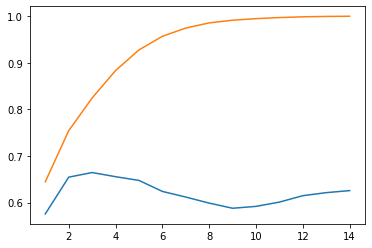

In [ ]:
import matplotlib.pyplot as plt

x = range(1,15)
plt.plot(x, teste_lista)
plt.plot(x, treino_lista)

> AUC treino cada vez maior, e AUC teste reduzindo. Gráfico característico de overfit.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

teste_lista = []
treino_lista = []
for i in range(1,5):
    modelo_arvore = RandomForestClassifier(max_depth=i)
    teste, treino = roda_modelo_cv(modelo_arvore, dados_limpos, 5, 10)
    teste_lista.append(teste)
    treino_lista.append(treino)

AUC  0.7754785968683994 - 0.8549995635150238
AUC  0.7868632672744513 - 0.8976687127896622
AUC  0.7931550390103022 - 0.9403124842531797
AUC  0.7983565832578993 - 0.9709123570096604


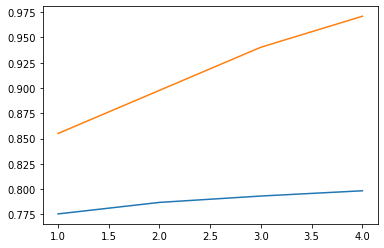

In [ ]:
import matplotlib.pyplot as plt

x = range(1,5)
plt.plot(x, teste_lista)
plt.plot(x, treino_lista)

In [ ]:
modelo_arvore = RandomForestClassifier(n_estimators=10)
teste, treino = roda_modelo_cv(modelo_arvore, dados_limpos, 5, 10)

AUC  0.7428159147484805 - 0.999444041300827


In [ ]:
modelo_arvore = RandomForestClassifier(n_estimators=100)
teste, treino = roda_modelo_cv(modelo_arvore, dados_limpos, 5, 10)

AUC  0.7939557739557739 - 1.0


In [ ]:
modelo_arvore = RandomForestClassifier(n_estimators=200)
teste, treino = roda_modelo_cv(modelo_arvore, dados_limpos, 5, 10)

AUC  0.7950421219664641 - 1.0


## Aula 06 - Finalizando a Validação

**O que aprendemos**

Gerar uma matriz de correlação dos dados;

Avaliar a importação dos atributos no resultado final;

Desenvolver uma função para remover dados correlacionados.


**Desafios**

Desafio 14: Ler no Sklearn sobre feature selection, feature importance.

Desafio 15: Plotar também a matriz de confusão.

Desafio 16: Repassar pelo desafio 12, com as bases de dados alteradas.

Desafio Extra: Criar um pipeline de treinamento.

Você pode baixar acessar os códigos e dados desta aula por esse [Link](https://github.com/alura-cursos/covid-19-clinical-2/blob/main/md_06_6.ipynb).

In [ ]:
dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 352 entries, (0, 0) to (384, 1920)
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), int8(1), object(1)
memory usage: 659.8+ KB


In [ ]:
dados_limpos.select_dtypes(exclude='float64')

PATIENT_VISIT_IDENTIFIER  ...  ICU
PATIENT_VISIT_IDENTIFIER                                 ...     
0                        0                            0  ...    1
2                        10                           2  ...    1
3                        15                           3  ...    0
4                        20                           4  ...    0
5                        25                           5  ...    0
...                                                 ...  ...  ...
380                      1900                       380  ...    1
381                      1905                       381  ...    0
382                      1910                       382  ...    1
383                      1915                       383  ...    0
384                      1920                       384  ...    0

[352 rows x 6 columns]

In [ ]:
alta_corr = 0.95
matrix_corr = dados_limpos.iloc[:,4:-2].corr().abs()
excluir = [coluna for coluna in matrix_corr.columns if any(matrix_corr[coluna] > alta_corr)]

In [ ]:
matrix_corr

DISEASE GROUPING 1  ...  OXYGEN_SATURATION_DIFF_REL
DISEASE GROUPING 1                         1.000000  ...                    0.056984
DISEASE GROUPING 2                         0.196347  ...                    0.099019
DISEASE GROUPING 3                         0.278271  ...                    0.006110
DISEASE GROUPING 4                         0.017529  ...                    0.025072
DISEASE GROUPING 5                         0.340370  ...                    0.097014
...                                             ...  ...                         ...
BLOODPRESSURE_SISTOLIC_DIFF_REL            0.054745  ...                    0.479010
HEART_RATE_DIFF_REL                        0.093512  ...                    0.350001
RESPIRATORY_RATE_DIFF_REL                  0.052568  ...                    0.342852
TEMPERATURE_DIFF_REL                       0.039692  ...                    0.493818
OXYGEN_SATURATION_DIFF_REL                 0.056984  ...                    1.000000

[225 rows x 225 columns]

In [ ]:
matrix_upper = matrix_corr.where(np.triu(np.ones(matrix_corr.shape), k=1).astype(np.bool))
excluir = [coluna for coluna in matrix_upper.columns if any(matrix_upper[coluna] > alta_corr)]
excluir

['ALBUMIN_MEAN',
 'ALBUMIN_MIN',
 'ALBUMIN_MAX',
 'BE_ARTERIAL_MEAN',
 'BE_ARTERIAL_MIN',
 'BE_ARTERIAL_MAX',
 'BE_VENOUS_MEAN',
 'BE_VENOUS_MIN',
 'BE_VENOUS_MAX',
 'BIC_ARTERIAL_MEAN',
 'BIC_ARTERIAL_MIN',
 'BIC_ARTERIAL_MAX',
 'BIC_VENOUS_MEAN',
 'BIC_VENOUS_MIN',
 'BIC_VENOUS_MAX',
 'BILLIRUBIN_MEAN',
 'BILLIRUBIN_MIN',
 'BILLIRUBIN_MAX',
 'BLAST_MEAN',
 'BLAST_MIN',
 'BLAST_MAX',
 'CALCIUM_MEAN',
 'CALCIUM_MIN',
 'CALCIUM_MAX',
 'CREATININ_MEAN',
 'CREATININ_MIN',
 'CREATININ_MAX',
 'FFA_MEAN',
 'FFA_MIN',
 'FFA_MAX',
 'GGT_MEAN',
 'GGT_MIN',
 'GGT_MAX',
 'GLUCOSE_MEAN',
 'GLUCOSE_MIN',
 'GLUCOSE_MAX',
 'HEMATOCRITE_MEAN',
 'HEMATOCRITE_MIN',
 'HEMATOCRITE_MAX',
 'HEMOGLOBIN_MEDIAN',
 'HEMOGLOBIN_MEAN',
 'HEMOGLOBIN_MIN',
 'HEMOGLOBIN_MAX',
 'INR_MEAN',
 'INR_MIN',
 'INR_MAX',
 'LACTATE_MEAN',
 'LACTATE_MIN',
 'LACTATE_MAX',
 'LEUKOCYTES_MEAN',
 'LEUKOCYTES_MIN',
 'LEUKOCYTES_MAX',
 'LINFOCITOS_MEAN',
 'LINFOCITOS_MIN',
 'LINFOCITOS_MAX',
 'NEUTROPHILES_MEDIAN',
 'NEUTROPHILES_MEA

In [ ]:
def remove_corr_var(dados, valor_corte):

    matrix_corr = dados.iloc[:,4:-2].corr().abs()
    matrix_upper = matrix_corr.where(np.triu(np.ones(matrix_corr.shape), k=1).astype(np.bool))
    excluir = [coluna for coluna in matrix_upper.columns if any(matrix_upper[coluna] > valor_corte)]

    return dados.drop(excluir, axis=1)

dados_limpos_sem_corr = remove_corr_var(dados_limpos, 0.95)

In [ ]:
dados_limpos_sem_corr

PATIENT_VISIT_IDENTIFIER  ...  ICU
PATIENT_VISIT_IDENTIFIER                                 ...     
0                        0                            0  ...    1
2                        10                           2  ...    1
3                        15                           3  ...    0
4                        20                           4  ...    0
5                        25                           5  ...    0
...                                                 ...  ...  ...
380                      1900                       380  ...    1
381                      1905                       381  ...    0
382                      1910                       382  ...    1
383                      1915                       383  ...    0
384                      1920                       384  ...    0

[352 rows x 100 columns]

In [ ]:
roda_modelo_cv(modelo_arvore, dados_limpos, 5, 10)

AUC  0.7950421219664641 - 1.0


(0.7950421219664641, 1.0)

In [ ]:
roda_modelo_cv(modelo_arvore, dados_limpos_sem_corr, 5, 10)

AUC  0.8042220502500108 - 1.0


(0.8042220502500108, 1.0)

Reduzir numero de variaveis pdoe ajudar a evitar um overfit.

# Compilado de todos os desafios

- Desafio 01: Transformar a coluna AGE_PERCENTIL em dados categoricos, mas utilizando outro metodo

- Desafio 02: Verificiar o impacto da mudanca nos resultados 

- Desafio 03: Pesquisar sobre F-score

- Desafio 04: Pesquisar e plotar a arvore de decisao criada pelo modelo

- Desafio 05: Criar uma funcao que gere a curva ROC

- Desafio 06: Pensar e tentar diminuir o efeito de aleatoriedade nas previsoes

- Desafio 07: Estudar a documentacao do sklearn e testar outros modelos

- Desafio 08: Testar outros splitter classes e observar as diferenças

- Desafio 09: Deixar o gráfico de AUC bonitão

- Desafio 10: Criar um sobreajuste com outra base de dados, outro modelo de ML e plotar o gráfico para análise. (Dica: Base do titanic)

- Desafio 11: Estudar um pouco mais sobre overfit e underfit 


- Desafio 12: Escolha um modelo de ML, estude os hiperparâmetros desse modelo e teste vários hiperparâmetros

- Desafio 13: Pesquisar como salvar um modelo treinado

- Desafio 14: Ler no Sklearn sobre feature selection, feature importance.

- Desafio 15: Plotar também a matriz de confusão

- Desafio 16: Repassar pelo desafio 12, com as bases de dados alteradas


- Desafio Extra: Criar um pipeline de treinamento no Scikit-Learn. 


## Desenvolvendo o desafio 13: salvar um modelo treinado

- [python - How to save a trained model by scikit-learn? - Stack Overflow](https://stackoverflow.com/questions/56107259/how-to-save-a-trained-model-by-scikit-learn) 
- [how to save your sklearn models | Analytics Vidhya](https://medium.com/analytics-vidhya/save-and-load-your-scikit-learn-models-in-a-minute-21c91a961e9b)

*Copied from [python - How to save a trained model by scikit-learn? - Stack Overflow](https://stackoverflow.com/questions/56107259/how-to-save-a-trained-model-by-scikit-learn)*:

You can use:

**1. [`pickle`](https://docs.python.org/3/library/pickle.html)**

```py
from sklearn import svm
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

clf = svm.SVC()
clf.fit(X, y)  

##########################
# SAVE-LOAD using pickle #
##########################
import pickle

# save
with open('model.pkl','wb') as f:
    pickle.dump(clf,f)

# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

clf2.predict(X[0:1])
```

**2. [`joblib`](https://joblib.readthedocs.io/en/latest/)**

From [`scikit-learn` documentation](https://scikit-learn.org/stable/modules/model_persistence.html):

> In the specific case of scikit-learn, it may be better to use joblib’s  replacement of pickle (dump & load), which is more efficient on  objects that carry large numpy arrays internally as is often the case  for fitted scikit-learn estimators, but can only pickle to the disk  and not to a string:

```py
from sklearn import svm
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

clf = svm.SVC()
clf.fit(X, y)  

##########################
# SAVE-LOAD using joblib #
##########################
import joblib

# save
joblib.dump(clf, "model.pkl") 

# load
clf2 = joblib.load("model.pkl")

clf2.predict(X[0:1])
```

